Distância entre média e mediana: 9.67%


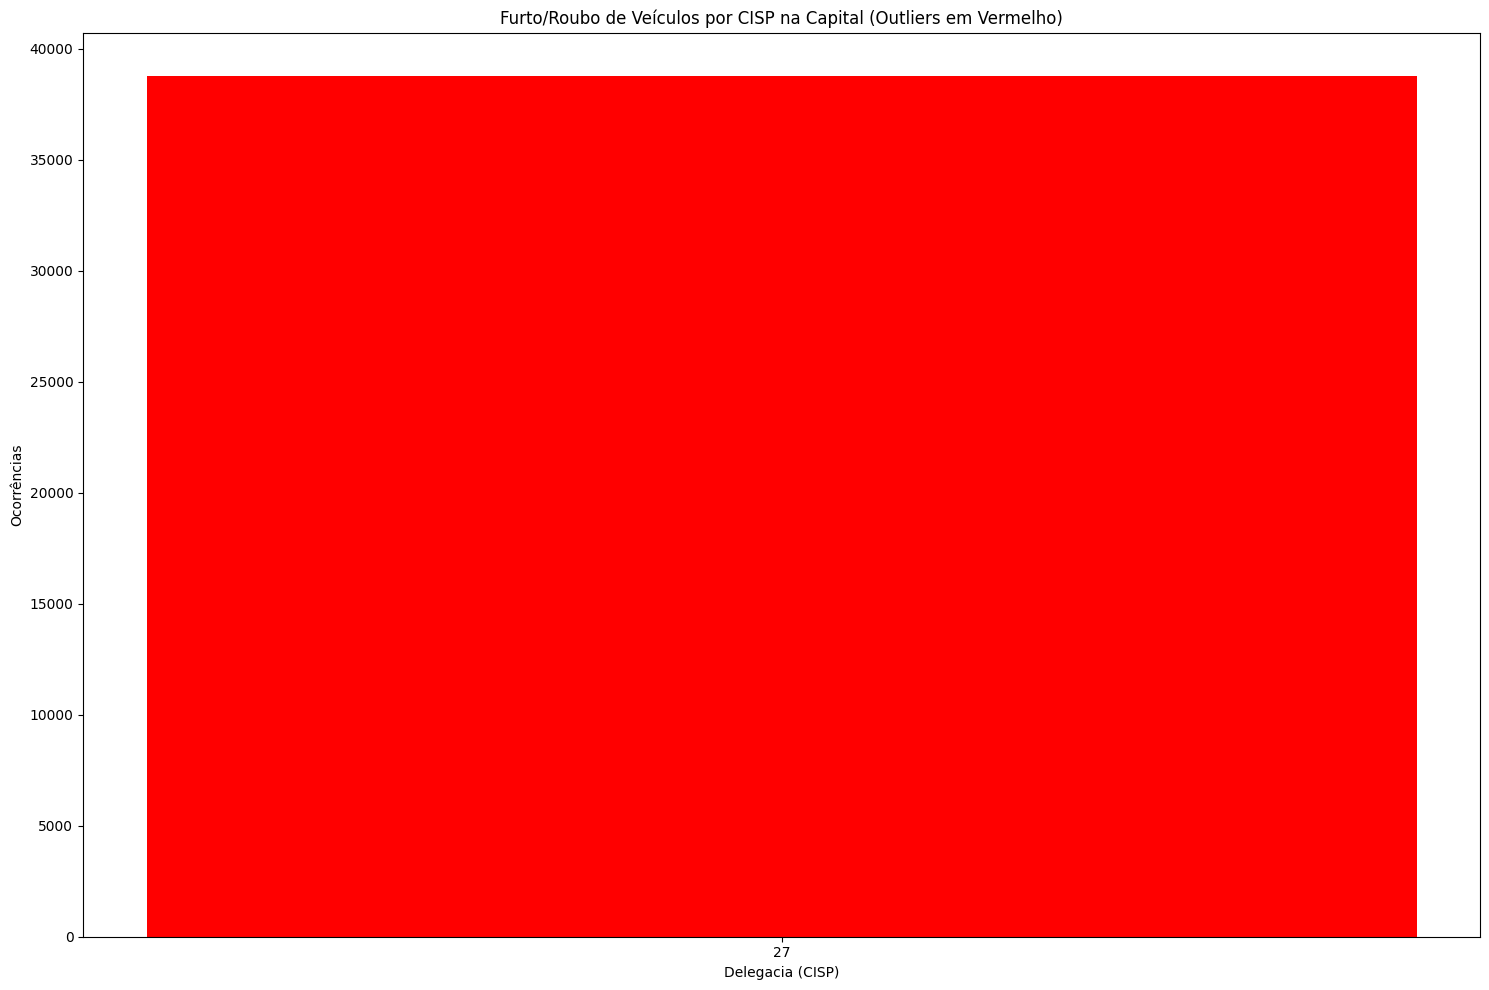

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


BaseDP = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep=';', encoding='latin1')


capital = BaseDP[BaseDP['munic'] == 'Rio de Janeiro'].copy()
capital.loc[:, 'veiculos'] = capital['furto_veiculos'] + capital['roubo_veiculo']
grupo_capital = capital.groupby('cisp')['veiculos'].sum().reset_index()

valores = np.array(grupo_capital['veiculos'])
q1 = np.percentile(valores, 25)
q3 = np.percentile(valores, 75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
media = np.mean(valores)
mediana = np.median(valores)
distancia = (media - mediana) / mediana
print(f'Distância entre média e mediana: {distancia * 100:.2f}%')

outliers = grupo_capital[grupo_capital['veiculos'] > limite_superior]

plt.figure(figsize=(15, 10))
plt.bar(outliers['cisp'].astype(str), outliers['veiculos'], color='red')
plt.title('Furto/Roubo de Veículos por CISP na Capital (Outliers em Vermelho)')
plt.xlabel('Delegacia (CISP)')
plt.ylabel('Ocorrências')
plt.tight_layout()
plt.show()

Distância entre média e mediana: 353.74%


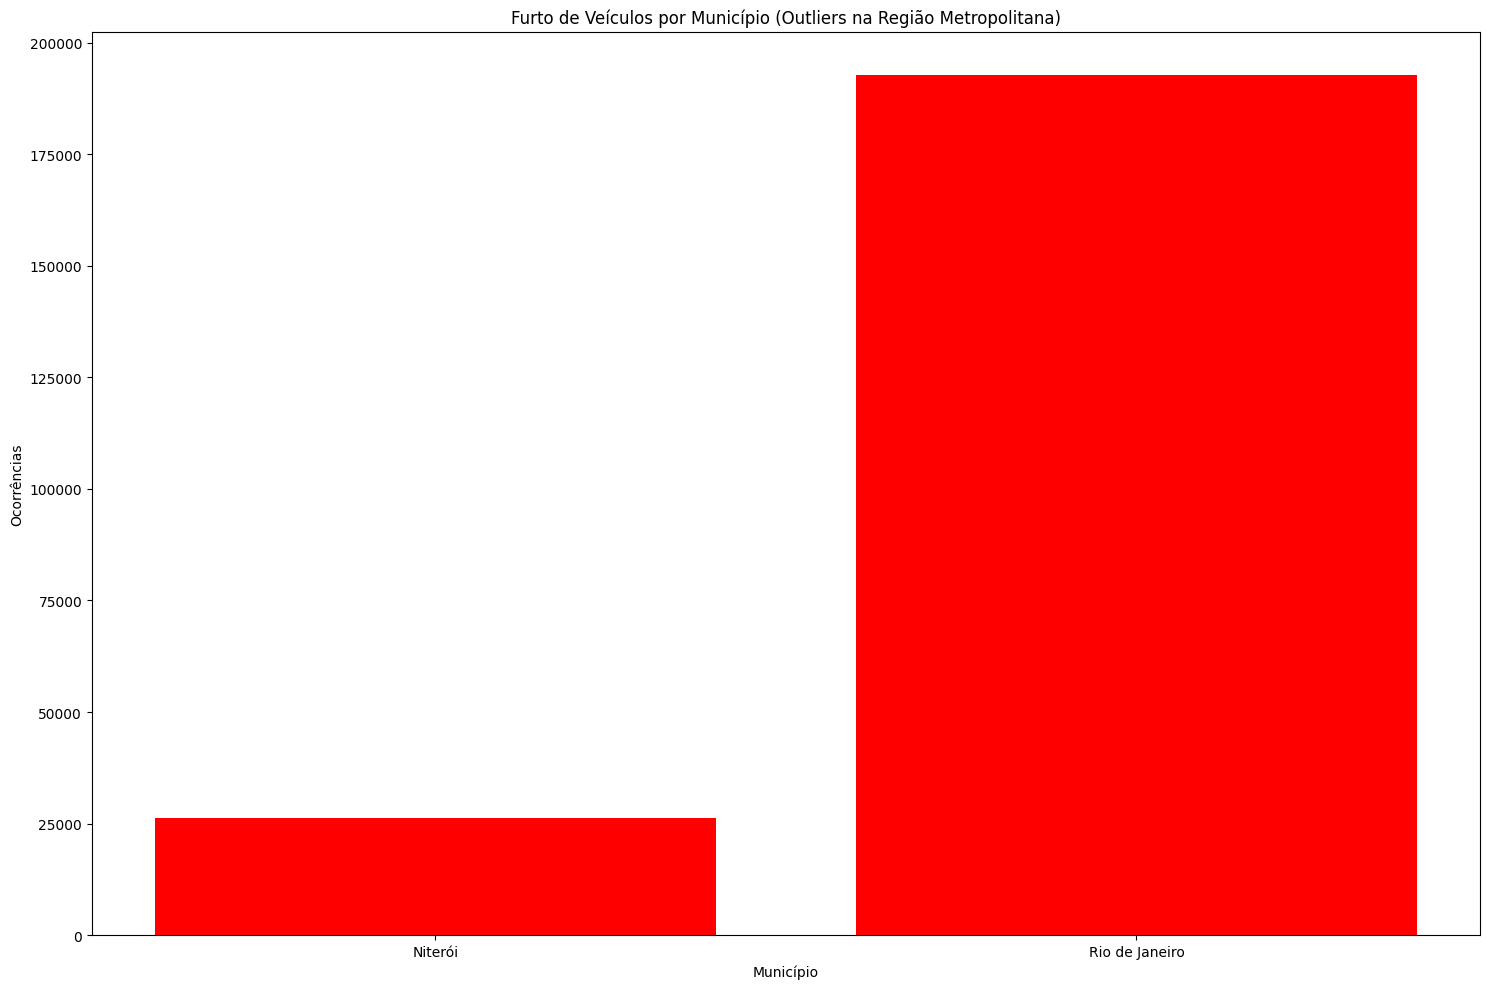

In [42]:

metropolitana = ["Belford Roxo",
    "Cachoeira de Macacu",
    "Duque de Caxias",
    "Guapimirim",
    "Itaboraí",
    "Itaguaí",
    "Japeri",
    "Magé",
    "Maricá",
    "Mesquita",
    "Niterói",
    "Nilópolis",
    "Nova Iguaçu",
    "Paracambi",
    "Queimados",
    "Rio Bonito",
    "Rio de Janeiro",
    "São Gonçalo",
    "São João de Meriti",
    "Seropédica",
    "Tanguá",
    "Petrópolis" ]


furto_mun = BaseDP[BaseDP['munic'].isin(metropolitana)].copy()


grupo_mun = furto_mun.groupby('munic')['furto_veiculos'].sum().reset_index()


valores = np.array(grupo_mun['furto_veiculos'])
q1 = np.percentile(valores, 25)
q3 = np.percentile(valores, 75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
media_veiculos = np.mean(valores)
mediana_veiculos = np.median(valores)
distancia = (media_veiculos - mediana_veiculos) / mediana_veiculos
print(f'Distância entre média e mediana: {distancia * 100:.2f}%')


outliers_mun = grupo_mun[grupo_mun['furto_veiculos'] > limite_superior]

# Gráfico
plt.figure(figsize=(15, 10))
plt.bar(outliers_mun['munic'], outliers_mun['furto_veiculos'], color='red')
plt.title('Furto de Veículos por Município (Outliers na Região Metropolitana)')
plt.xlabel('Município')
plt.ylabel('Ocorrências')
plt.tight_layout()
plt.show()


Distância entre média e mediana (gestão atual): 23.26%
Distância entre média e mediana (gestão anterior): 41.24%


C:\Users\matheus.coimbra\AppData\Local\Temp\ipykernel_31624\579908328.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


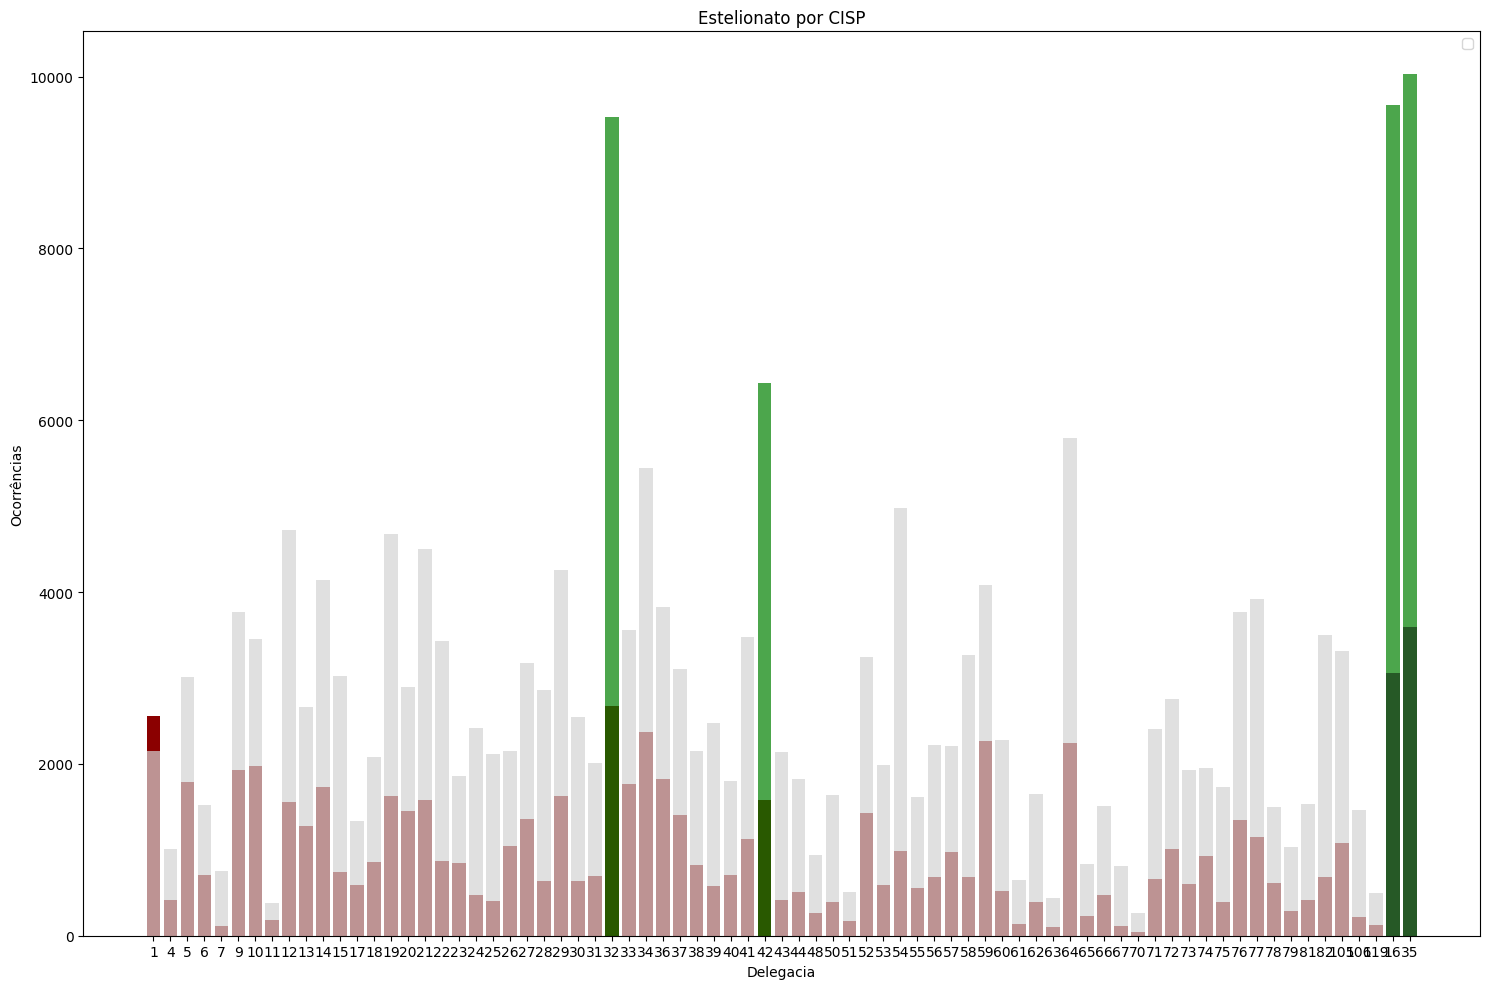

In [43]:
# Converter a coluna 'ano' para numérica
BaseDP['ano'] = pd.to_numeric(BaseDP['ano'], errors='coerce')


gestao_atual = BaseDP[BaseDP['ano'].isin([2023, 2024])].copy()
gestao_anterior = BaseDP[BaseDP['ano'].isin([2019, 2020])].copy()


gestao_atual_rm = gestao_atual[gestao_atual['munic'].isin(metropolitana)]
gestao_anterior_rm = gestao_anterior[gestao_anterior['munic'].isin(metropolitana)]

grupo_atual = gestao_atual_rm.groupby('cisp')['estelionato'].sum().reset_index()
grupo_anterior = gestao_anterior_rm.groupby('cisp')['estelionato'].sum().reset_index()

# Estatísticas gestão atual
valores_atual = np.array(grupo_atual['estelionato'])
q1_atual = np.percentile(valores_atual, 25)
q3_atual = np.percentile(valores_atual, 75)
iqr_atual = q3_atual - q1_atual
limite_inferior_atual = q1_atual - 1.5 * iqr_atual
limite_superior_atual = q3_atual + 1.5 * iqr_atual
media_atual = np.mean(valores_atual)
mediana_atual = np.median(valores_atual)
distancia_atual = (media_atual - mediana_atual) / mediana_atual
print(f'Distância entre média e mediana (gestão atual): {distancia_atual * 100:.2f}%')

# Estatísticas gestão anterior
valores_anterior = np.array(grupo_anterior['estelionato'])
q1_anterior = np.percentile(valores_anterior, 25)
q3_anterior = np.percentile(valores_anterior, 75)
iqr_anterior = q3_anterior - q1_anterior
limite_inferior_anterior = q1_anterior - 1.5 * iqr_anterior
limite_superior_anterior = q3_anterior + 1.5 * iqr_anterior
media_anterior = np.mean(valores_anterior)
mediana_anterior = np.median(valores_anterior)
distancia_anterior = (media_anterior - mediana_anterior) / mediana_anterior
print(f'Distância entre média e mediana (gestão anterior): {distancia_anterior * 100:.2f}%')

# Separar dados para cada gestão
outliers_atual = grupo_atual[grupo_atual['estelionato'] > limite_superior_atual]
normais_atual = grupo_atual[grupo_atual['estelionato'] <= limite_superior_atual]

outliers_anterior = grupo_anterior[grupo_anterior['estelionato'] > limite_superior_anterior]
normais_anterior = grupo_anterior[grupo_anterior['estelionato'] <= limite_superior_anterior]


plt.figure(figsize=(15, 10))
# Gestão anterior
plt.bar(normais_anterior['cisp'].astype(str), normais_anterior['estelionato'], color='darkred')
plt.bar(outliers_anterior['cisp'].astype(str), outliers_anterior['estelionato'], color='purple')
# Gestão atual
plt.bar(normais_atual['cisp'].astype(str), normais_atual['estelionato'], color='lightgray', alpha=0.7)
plt.bar(outliers_atual['cisp'].astype(str), outliers_atual['estelionato'], color='green', alpha=0.7)
plt.title('Estelionato por CISP')
plt.xlabel('Delegacia')
plt.ylabel('Ocorrências')
plt.legend()
plt.tight_layout()
plt.show()

Distância entre média e mediana (gestão atual): 23.26%


C:\Users\matheus.coimbra\AppData\Local\Temp\ipykernel_31624\1203662843.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


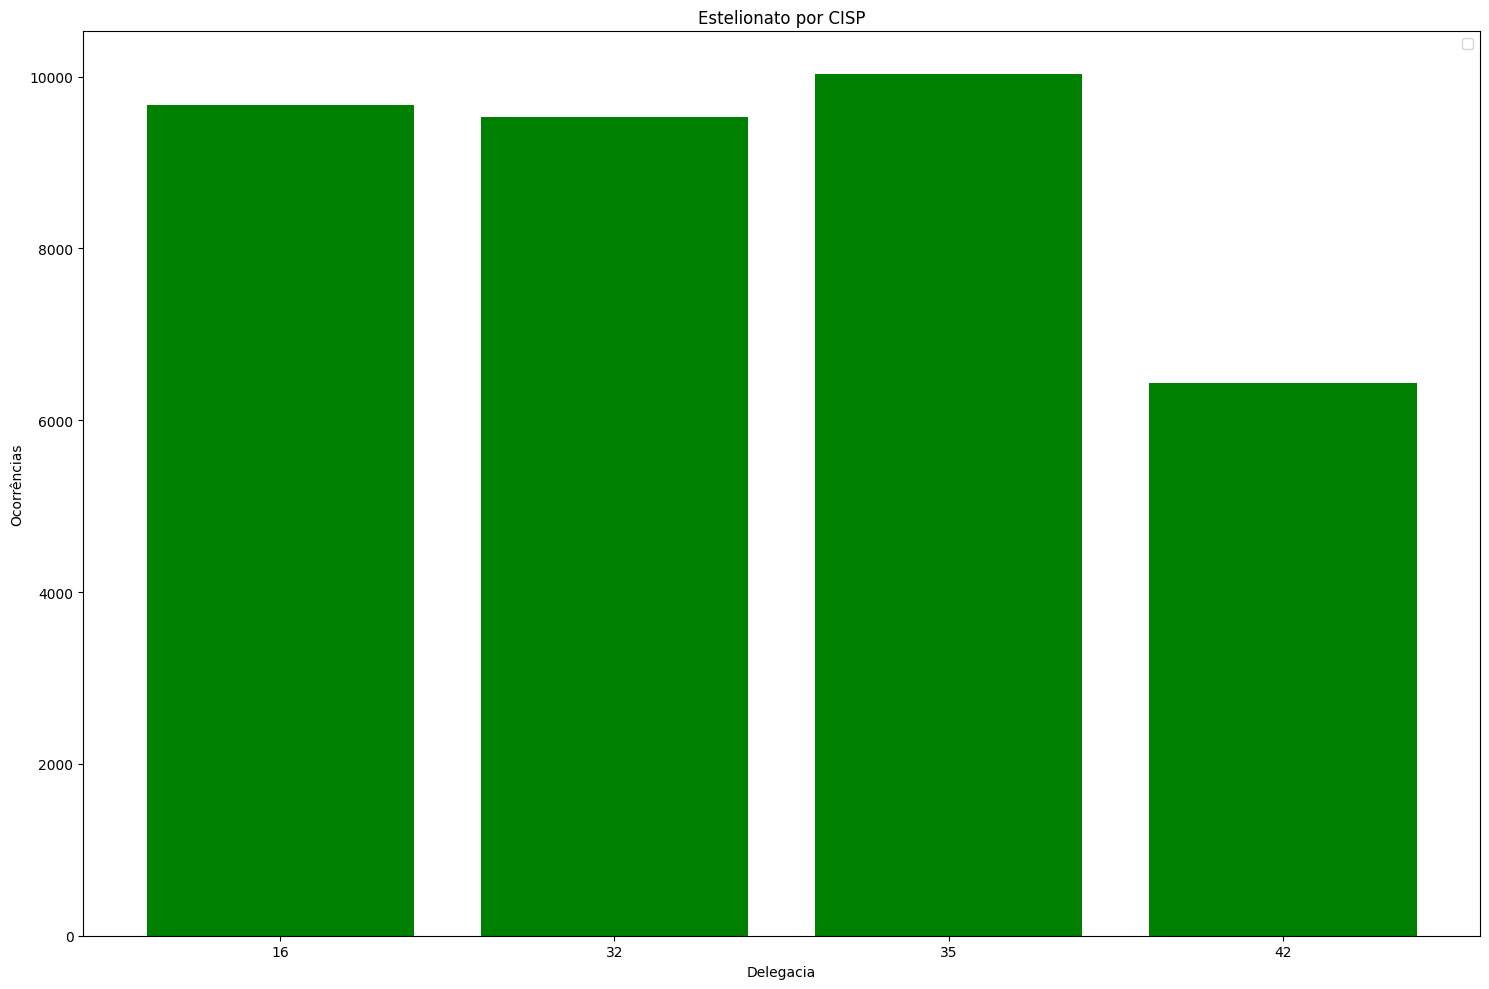

In [45]:
# Converter a coluna 'ano' para numérica
BaseDP['ano'] = pd.to_numeric(BaseDP['ano'], errors='coerce')


gestao_atual = BaseDP[BaseDP['ano'].isin([2023, 2024])].copy()


gestao_atual_rm = gestao_atual[gestao_atual['munic'].isin(metropolitana)]


grupo_atual = gestao_atual_rm.groupby('cisp')['estelionato'].sum().reset_index()

# Estatísticas gestão atual
valores_atual = np.array(grupo_atual['estelionato'])
q1_atual = np.percentile(valores_atual, 25)
q3_atual = np.percentile(valores_atual, 75)
iqr_atual = q3_atual - q1_atual
limite_inferior_atual = q1_atual - 1.5 * iqr_atual
limite_superior_atual = q3_atual + 1.5 * iqr_atual
media_atual = np.mean(valores_atual)
mediana_atual = np.median(valores_atual)
distancia_atual = (media_atual - mediana_atual) / mediana_atual
print(f'Distância entre média e mediana (gestão atual): {distancia_atual * 100:.2f}%')

# Separar dados para cada gestão
outliers_atual = grupo_atual[grupo_atual['estelionato'] > limite_superior_atual]
normais_atual = grupo_atual[grupo_atual['estelionato'] <= limite_superior_atual]

plt.figure(figsize=(15, 10))
plt.bar(outliers_atual['cisp'].astype(str), outliers_atual['estelionato'], color='green')
plt.title('Estelionato por CISP')
plt.xlabel('Delegacia')
plt.ylabel('Ocorrências')
plt.legend()
plt.tight_layout()
plt.show()

Distância entre média e mediana (gestão anterior): 41.24%
293900.00%
-104500.00%


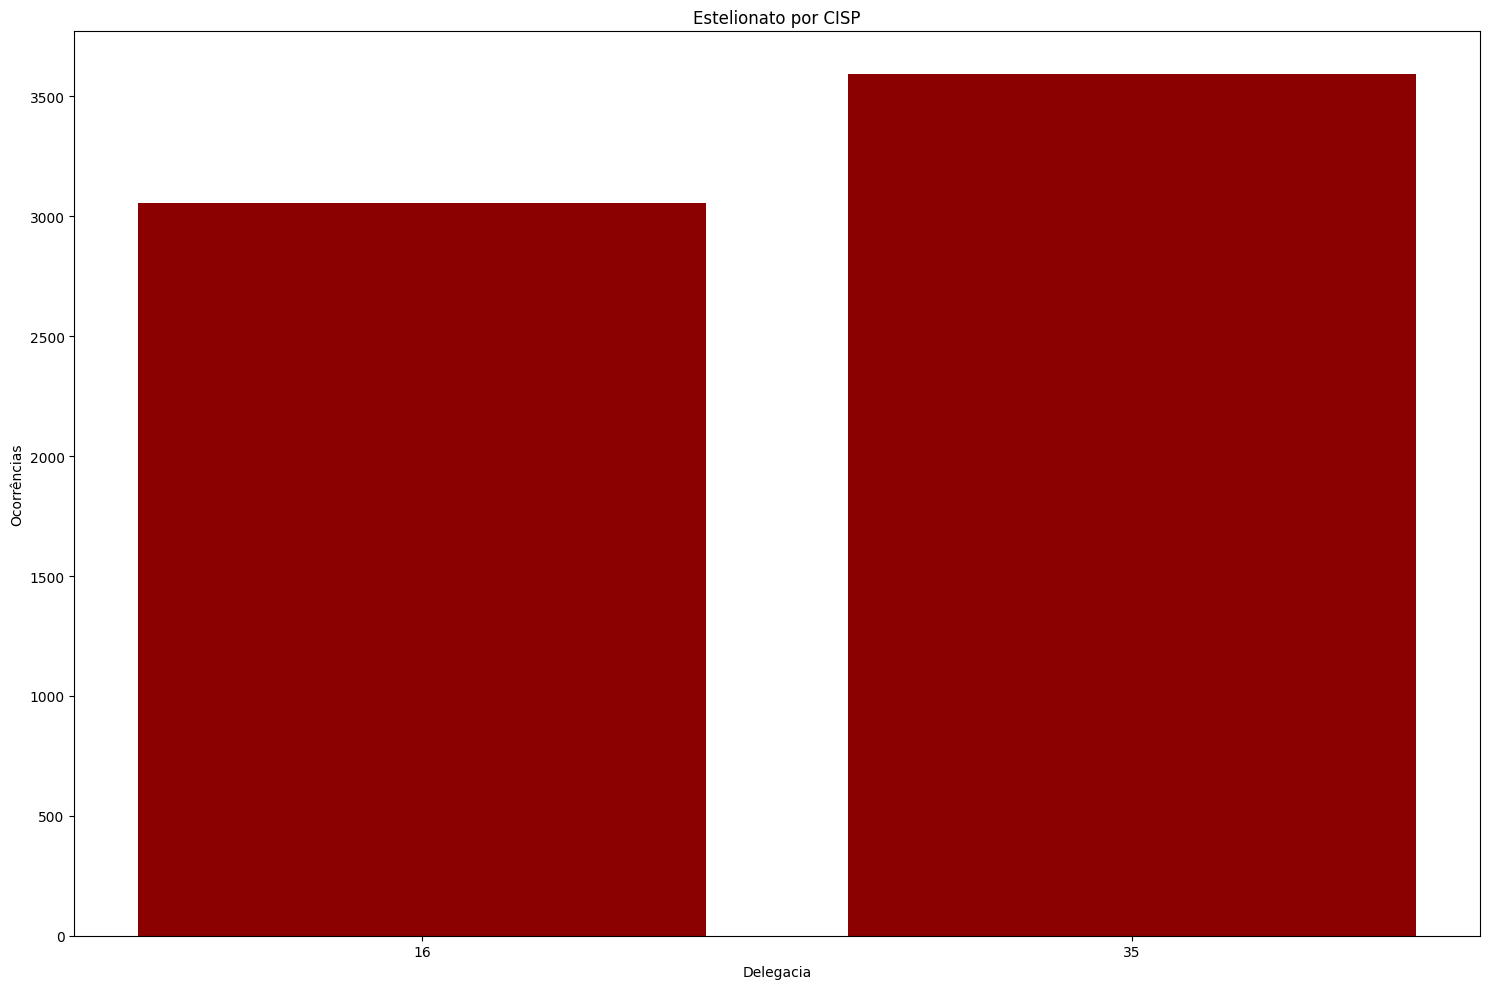

In [46]:
BaseDP['ano'] = pd.to_numeric(BaseDP['ano'], errors='coerce')


gestao_anterior = BaseDP[BaseDP['ano'].isin([2019, 2020])].copy()

gestao_anterior_rm = gestao_anterior[gestao_anterior['munic'].isin(metropolitana)]

grupo_anterior = gestao_anterior_rm.groupby('cisp')['estelionato'].sum().reset_index()

# Estatísticas gestão anterior
valores_anterior = np.array(grupo_anterior['estelionato'])
q1_anterior = np.percentile(valores_anterior, 25)
q3_anterior = np.percentile(valores_anterior, 75)
iqr_anterior = q3_anterior - q1_anterior
limite_inferior_anterior = q1_anterior - 1.5 * iqr_anterior.round(1)
limite_superior_anterior = q3_anterior + 1.5 * iqr_anterior.round(1)
media_anterior = np.mean(valores_anterior)
mediana_anterior = np.median(valores_anterior)
distancia_anterior = (media_anterior - mediana_anterior) / mediana_anterior
print(f'Distância entre média e mediana (gestão anterior): {distancia_anterior * 100:.2f}%')

outliers_anterior = grupo_anterior[grupo_anterior['estelionato'] > limite_superior_anterior]
normais_anterior = grupo_anterior[grupo_anterior['estelionato'] <= limite_superior_anterior]
print(f'{limite_superior_anterior*100:.2f}%')
print(f'{limite_inferior_anterior*100:.2f}%')

plt.figure(figsize=(15, 10))
# Gestão anterior
#plt.bar(normais_anterior['cisp'].astype(str), normais_anterior['estelionato'], color='green')
plt.bar(outliers_anterior['cisp'].astype(str), outliers_anterior['estelionato'], color='darkred')
plt.title('Estelionato por CISP')
plt.xlabel('Delegacia')
plt.ylabel('Ocorrências')
plt.tight_layout()
plt.show()

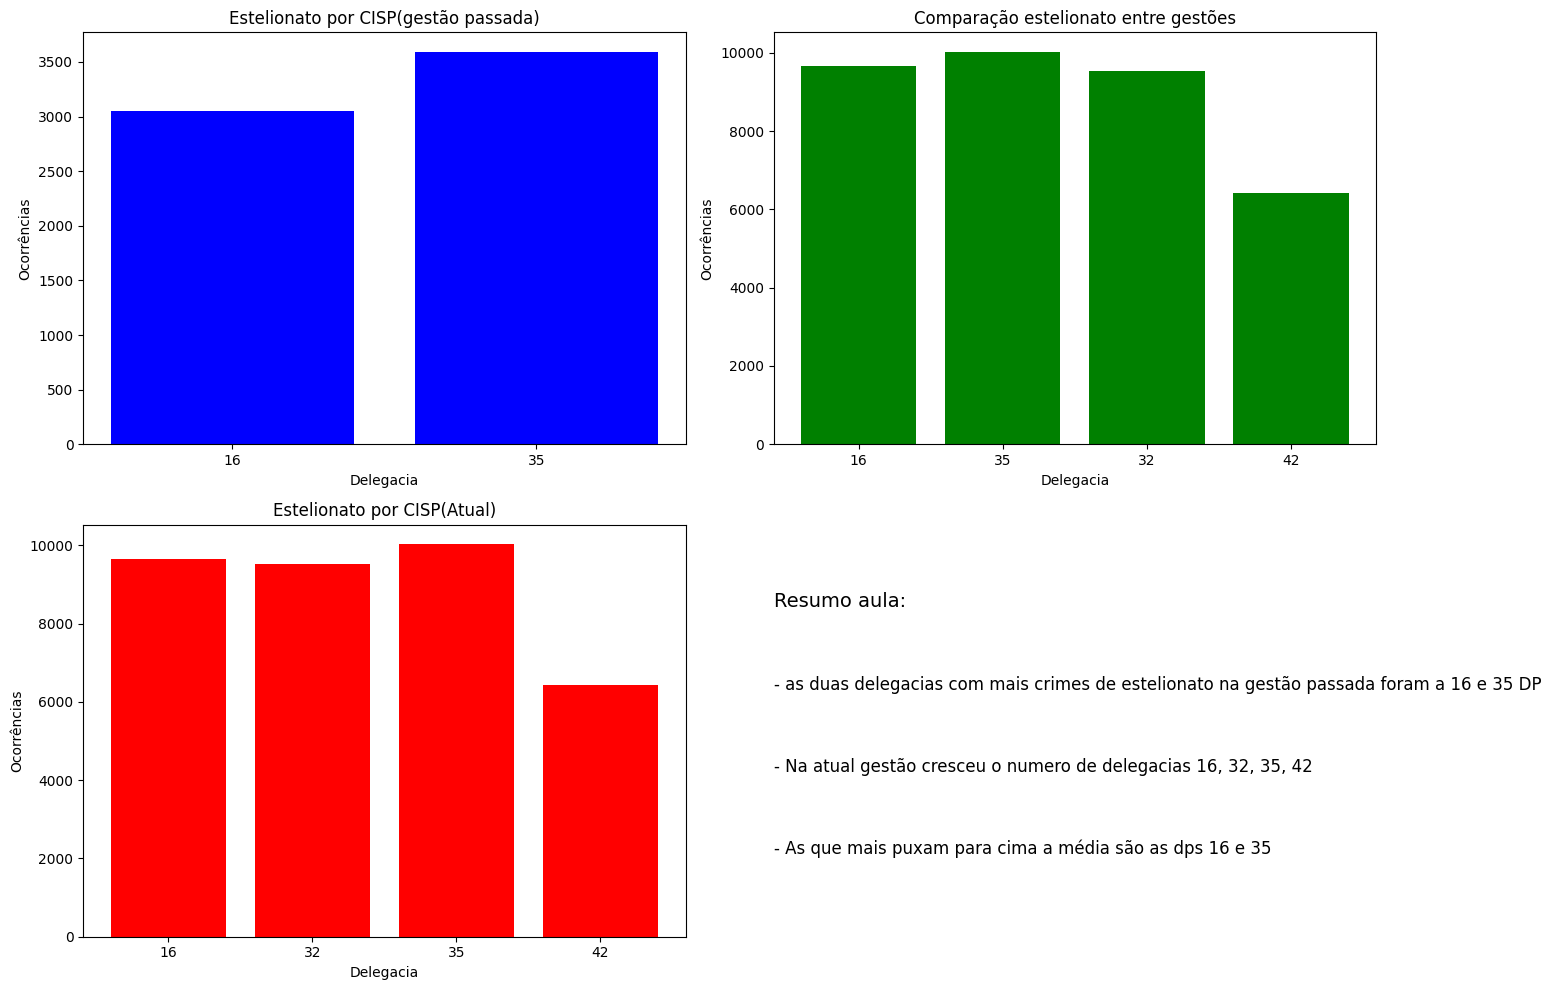

In [48]:
fig, axs = plt.subplots(2,2, figsize = (16,10))

#axs[0,0].bar(normais_anterior['cisp'].astype(str),normais_anterior['estelionato'], color = 'green')
axs[0,0].bar(outliers_anterior['cisp'].astype(str),outliers_anterior['estelionato'], color = 'blue')
axs[0,0].set_title('Estelionato por CISP(gestão passada)')
axs[0,0].set_xlabel('Delegacia')
axs[0,0].set_ylabel('Ocorrências')

#axs[1,0].bar(normais_atual['cisp'].astype(str),normais_atual['estelionato'], color = 'green')
axs[1,0].bar(outliers_atual['cisp'].astype(str),outliers_atual['estelionato'], color = 'red')
axs[1,0].set_title('Estelionato por CISP(Atual)')
axs[1,0].set_xlabel('Delegacia')
axs[1,0].set_ylabel('Ocorrências')

#axs[0,1].bar(normais_anterior['cisp'].astype(str),normais_anterior['estelionato'], color = 'darkred')
axs[0,1].bar(outliers_anterior['cisp'].astype(str),outliers_anterior['estelionato'], color = 'purple')
#axs[0,1].bar(normais_atual['cisp'].astype(str),normais_atual['estelionato'], color = 'lightgreen')
axs[0,1].bar(outliers_atual['cisp'].astype(str),outliers_atual['estelionato'], color = 'green')
axs[0,1].set_title('Comparação estelionato entre gestões')
axs[0,1].set_xlabel('Delegacia')
axs[0,1].set_ylabel('Ocorrências')

axs[1,1].axis('off')

axs[1,1].text(0.0, 0.8, 'Resumo aula:', fontsize=14, color = 'black')
axs[1,1].text(0.0, 0.6, '- as duas delegacias com mais crimes de estelionato na gestão passada foram a 16 e 35 DP', fontsize=12, color = 'black')
axs[1,1].text(0.0, 0.4, '- Na atual gestão cresceu o numero de delegacias 16, 32, 35, 42', fontsize=12, color = 'black')
axs[1,1].text(0.0, 0.2, '- As que mais puxam para cima a média são as dps 16 e 35', fontsize=12, color = 'black')
plt.tight_layout()

